# Indigenous Trees

A look at some of the indigenous trees of Seattle.

## TODO

* Come up with some specific colors for the top 5 indigenous trees in the city so I can use consistent coloring between the displays.
  - The color shoud contrast well with whatever background color is used for the non-targeted trees (like the transparent gray).
* Rendering maps at an appropriate aspect ratio.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
dftrees = pd.read_csv('data/trees_of_seattle.csv', sep='|')
original_count = len(dftrees)
# Filtering out a few trees that are way outside the city range (which causes the maps to render funny).
dftrees = dftrees[dftrees['x'] > 1245000]
dftrees = dftrees[dftrees['y'] < 275000]
with open('data/trees_of_seattle.csv.metadata.json') as fin:
    dftrees_metadata_raw = fin.read()
    dftrees_metadata = json.loads(dftrees_metadata_raw)
print(f'Metadata for trees_of_seattle.csv: {repr(dftrees_metadata)}')
print(f'Discarded {original_count - len(dftrees)} out-of-bounds records. Final count {len(dftrees)}')
del dftrees_metadata_raw
del original_count

Metadata for trees_of_seattle.csv: {'version': '2', 'record_count': 246378, 'discarded_record_count': 8332, 'discarded_nonliving_trees_record_count': 6936, 'discarded_unknown_trees_record_count': 1396}
Discarded 7 out-of-bounds records. Final count 246371


In [3]:
# Split up the trees dataset into indigenous and non-indigenous sets.
dftrees_ind = dftrees[dftrees['indigenous']]
dftrees_non = dftrees[~dftrees['indigenous']]
print(f'Indigenous     {len(dftrees_ind):6} ({len(dftrees_ind) / len(dftrees) * 100:4.1f}%)')
print(f'Non-indigenous {len(dftrees_non):6} ({len(dftrees_non) / len(dftrees) * 100:4.1f}%)')

Indigenous      17107 ( 6.9%)
Non-indigenous 229264 (93.1%)


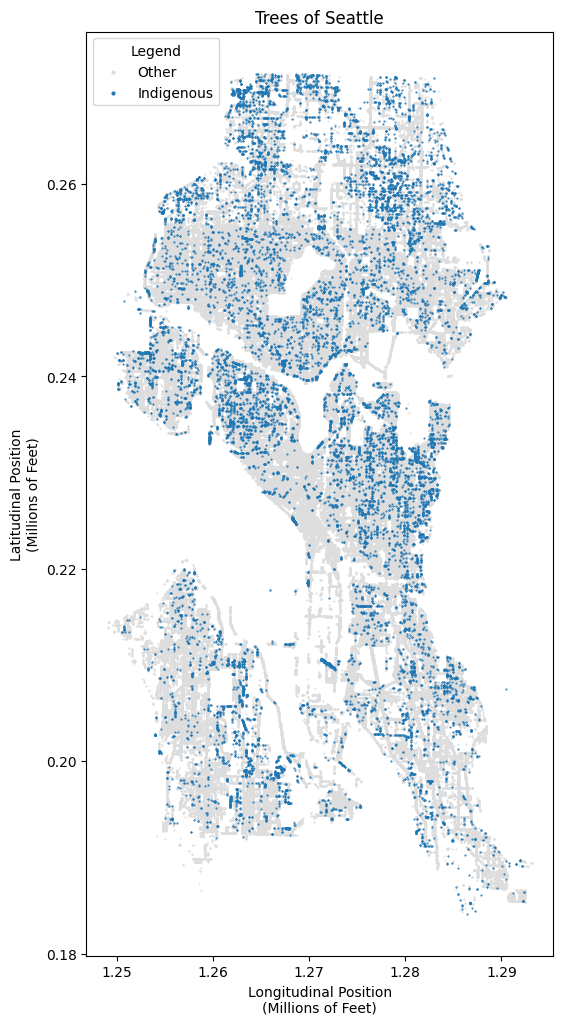

In [4]:
# Plot the location of trees in the city.
fig, ax = plt.subplots(figsize=(12, 12))  # x-dimension gets "forgotten" after set_aspect().

def scale_formatter(value, tick_number):
    return f'{value / 1_000_000.0:.2f}'

ax.xaxis.set_major_formatter(ticker.FuncFormatter(scale_formatter))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(scale_formatter))

ax.scatter(dftrees_non['x'], dftrees_non['y'], s=.25, color='#DDD', label='Other')
ax.scatter(dftrees_ind['x'], dftrees_ind['y'], s=.25, label='Indigenous')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('Longitudinal Position\n(Millions of Feet)')
ax.set_ylabel('Latitudinal Position\n(Millions of Feet)')
ax.set_title('Trees of Seattle')
ax.legend(scatterpoints=1, markerscale=4, title='Legend')

plt.show()

<Axes: >

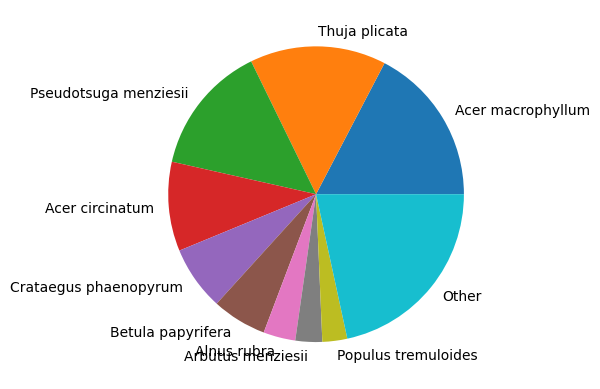

In [5]:
indigenous_counts = dftrees_ind['scientificname'].value_counts()

# The first X fraction of the trees are used as primary labels. Everything else is labeled "Other".
OTHER_CUTOFF_FRACTION = 0.80

cum_fractions = (indigenous_counts / indigenous_counts.sum()).cumsum()
before_cutoff = indigenous_counts[cum_fractions < OTHER_CUTOFF_FRACTION]
after_cutoff = indigenous_counts[cum_fractions >= OTHER_CUTOFF_FRACTION]
others = pd.Series([after_cutoff.sum()], index=['Other'])

result_counts = pd.concat([before_cutoff, others])
result_counts.plot(kind='pie')

# TODO Cleanup chart.
# TODO Add percents and counts in the labels.

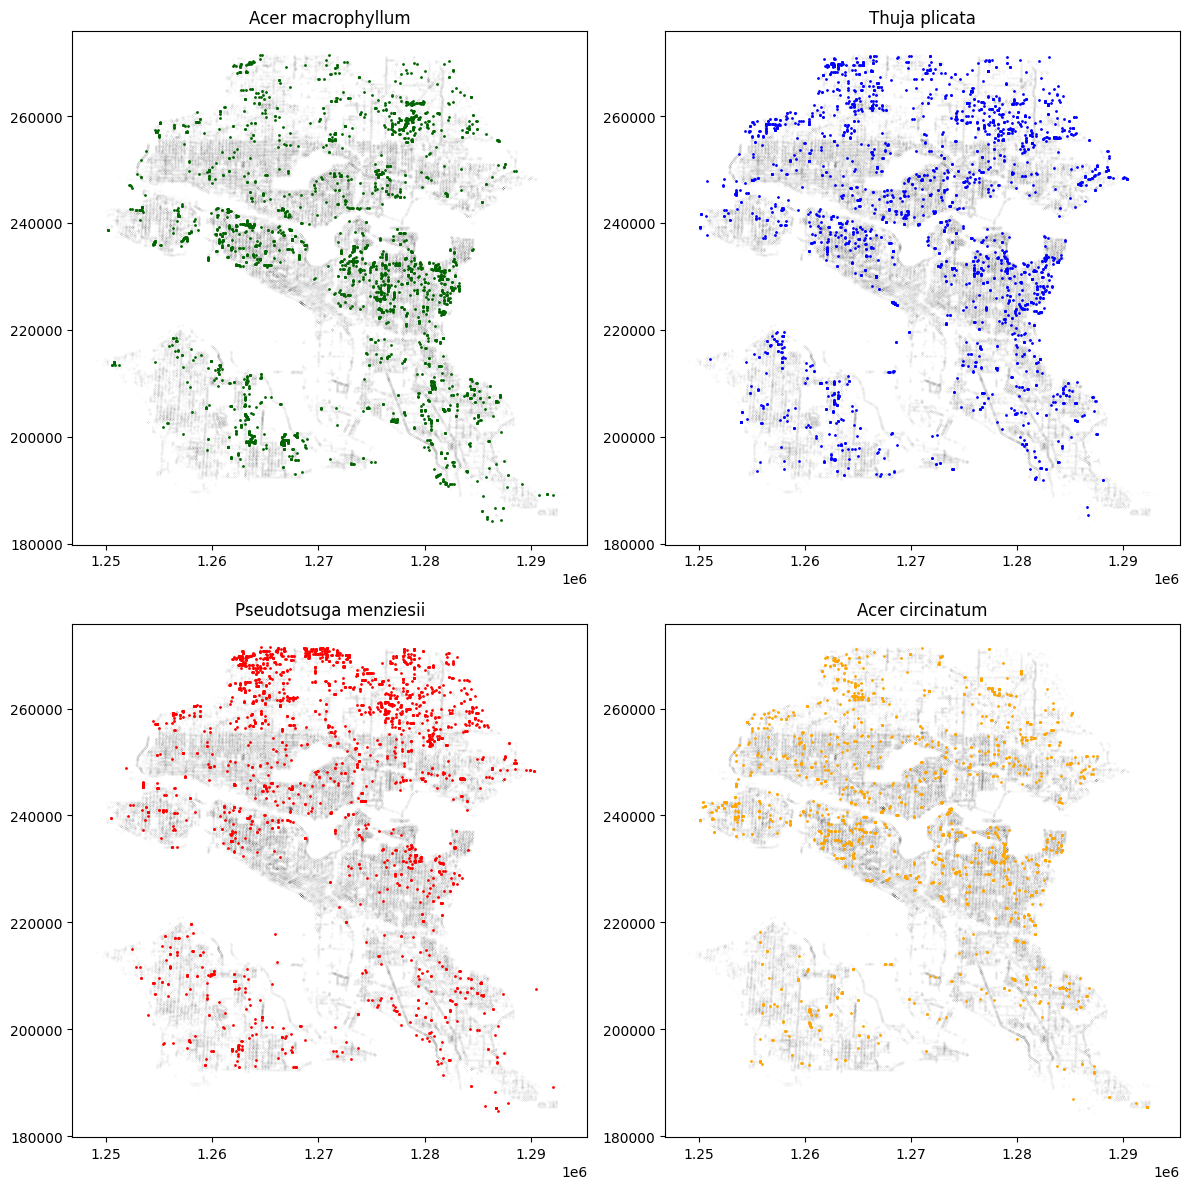

In [6]:
scientificnames = ['Acer macrophyllum', 'Thuja plicata', 'Pseudotsuga menziesii', 'Acer circinatum']
colors = ['darkgreen', 'blue', 'red', 'orange']

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    scientificname = scientificnames[i]
    color = colors[i]
    mask = dftrees['scientificname'] == scientificname
    dftrees_target = dftrees[mask]
    dftrees_other = dftrees[~mask]
    ax.scatter(dftrees_other['x'], dftrees_other['y'], s=.00003, color='black')
    ax.scatter(dftrees_target['x'], dftrees_target['y'], s=1, color=colors[i])
    ax.set_title(scientificname)

plt.tight_layout()
plt.show()
# TODO - Title
# TODO - Clean up bounds.
# TODO - Clean up labels on left and bottom.

In [7]:
# Plot the location of specific trees in the city.
def plot_trees_by_scientific_name(scientificname):
    dftrees_bg = dftrees[dftrees['scientificname'] != scientificname]
    dftrees_fg = dftrees[dftrees['scientificname'] == scientificname]

    fig, ax = plt.subplots(figsize=(12, 12))  # x-dimension gets "forgotten" after set_aspect().
    
    def scale_formatter(value, tick_number):
        return f'{value / 1_000_000.0:.2f}'
    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(scale_formatter))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(scale_formatter))
    
    ax.scatter(dftrees_bg['x'], dftrees_bg['y'], s=.25, color='#DDD', label='Other')
    ax.scatter(dftrees_fg['x'], dftrees_fg['y'], s=.25, label=scientificname)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('Longitudinal Position\n(Millions of Feet)')
    ax.set_ylabel('Latitudinal Position\n(Millions of Feet)')
    ax.set_title(f'{scientificname}')
    ax.legend(scatterpoints=1, markerscale=4, title='Legend')
    
    plt.show()

scientificname
Sambucus racemosa            11
Abies amabilis               10
Myrica californica           10
Ribes sanguineum              9
Physocarpus capitatus         8
Prunus americana              8
Callitropsis nootkatensis     7
Mahonia aquifolium            3
Rubus ursinus                 2
Rubus parviflorus             1
Name: count, dtype: int64


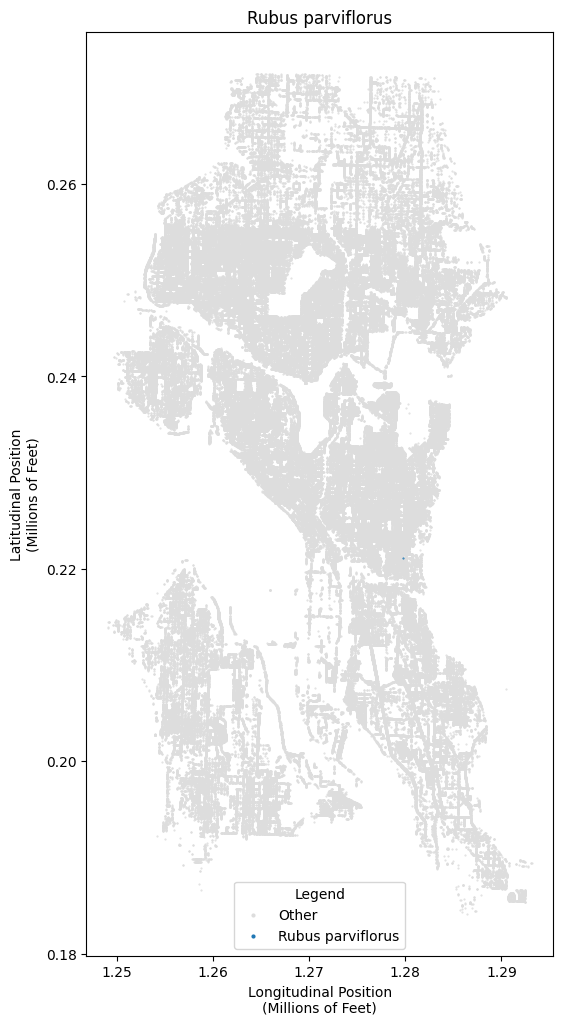

In [8]:
print(dftrees_ind['scientificname'].value_counts()[-10:])
plot_trees_by_scientific_name('Rubus parviflorus')

scientificname
Acer palmatum                     8001
Acer rubrum                       7504
Malus sp.                         7016
Acer platanoides                  6463
Prunus cerasifera cv/hyb          6176
Prunus serrulata                  5280
Prunus cerasifera `Thunderclou    4987
Crataegus laevigata               4966
Liquidambar styraciflua           4935
Prunus sp.                        4639
Prunus  `Kwanzan` (Sato Zakura    4320
Acer truncatum x A platanoides    4300
Prunus x blireiana                4229
Pyrus calleryana                  3830
Cornus kousa                      3491
Styrax japonicus                  3300
Betula pendula                    3299
Acer griseum                      3212
Quercus rubra                     2973
Tilia cordata                     2835
Cercidiphyllum japonicum          2781
Platanus x acerifolia             2147
Carpinus caroliniana              2035
Cercis canadensis                 1859
Quercus coccinea                  1854
Amelanchie

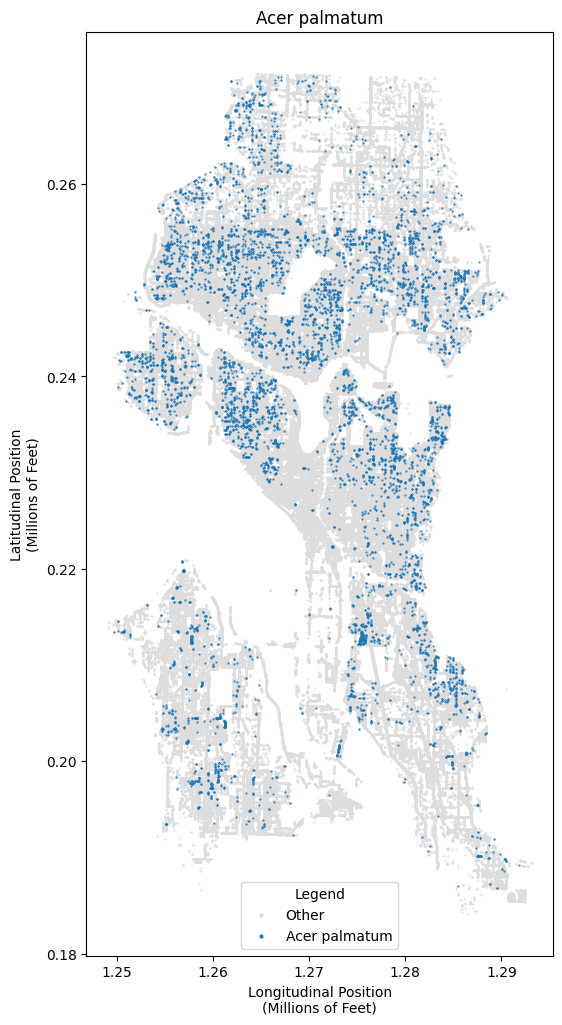

In [9]:
print(dftrees_non['scientificname'].value_counts()[:50])
plot_trees_by_scientific_name('Acer palmatum')